# 相关系数

------

相关系数是度量两变量之间的线性相关程度。其值在-1到1之间，当两变量相关系数大于0的时候，表明当一个变量增大，另外一个变量也会增大。当小于0的时候
与之相反。当相关系数的绝对值越大的时候，表明其相关的程度越大。相关系数为0的时候，变量之间的关联程度越小。

定义$X$,$Y$的相关系数为：
$$r = \frac{Cov(X,Y)}{std(X)std(Y)}$$
其中$Cov$是协方差，$std$是标准差.

------

------
## 协方差和相关系数

相关系数是协方差的归一化。当$X$,$Y$都是一个相同长度的数值序列的时候，此时$X$,$Y$并不服从标准正太分布。此时将数据的协方差$c=Cov(X,Y)$,此$c$并不等于协方差。现在我们将$X$,$Y$标准化之后，即将数据的转换成服从正太分布。则此时转换之后的$X'$，$y'$的协方差就是$X$,$Y$的相关系数。

下面我们将对这一关系进行试验：

----

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
np.random.seed(100)
X = np.random.randint(0, 100, 50)
Y = np.random.randint(100, 200, 50)
## 下面显示数据平均值，和方差，可以看出数据不符合正太分布
print("the mean of the X: ", X.mean())
print("the std of the X: ", X.std())
print("the mean of the Y: ", Y.mean())
print("the stf of the Y: ", Y.std())

the mean of the X:  47.6
the std of the X:  31.6486966556
the mean of the Y:  149.5
the stf of the Y:  27.565376834


In [13]:
#X和Y的相关系数
print("the correlation coefficient: ", np.corrcoef(X, Y)[0, 1])

the correlation coefficient:  0.283330654093


In [14]:
#将数据正太化之后，观察相关系数,可以看出相等
print("the Covariance: ", np.corrcoef((X - X.mean())/X.std(), (Y - Y.mean())/Y.std())[0, 1])

the Covariance:  0.283330654093


$$\frac{Cov(X, Y)}{std(X)std(Y)}$$

$$= \frac{Cov(X, Y)}{\sqrt{var(X)}\sqrt{var(Y)}}$$

$$= \frac{Cov(X, Y)}{\sqrt{Cov(X, X)}\sqrt{Cov(Y, Y)}}$$

## 对有线性关系的变量的相关系数和协方差的分析

In [15]:
X = np.random.randint(0, 100, 50)
Y = 2 * X + 100

print("correlation coefficient: \n", np.corrcoef(X, Y))
print("covariance: \n", np.cov(X, Y))

correlation coefficient: 
 [[ 1.  1.]
 [ 1.  1.]]
covariance: 
 [[  804.67591837  1609.35183673]
 [ 1609.35183673  3218.70367347]]


In [16]:
((X - X.mean()) ** 2).sum() / (len(X) - 1)

804.67591836734687

## 下面看有正太噪声的的相关系数
下面可以看出当噪声越小的时候，其相关系数的越大。

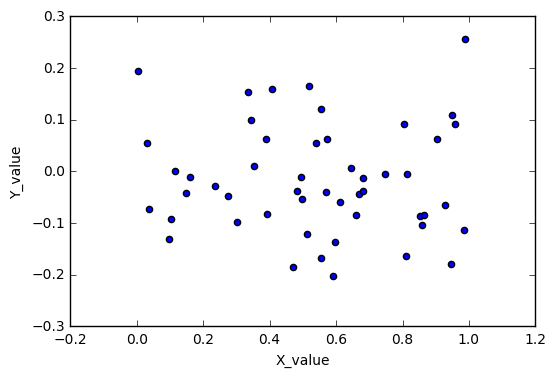

the correlation:  -0.0457128957794


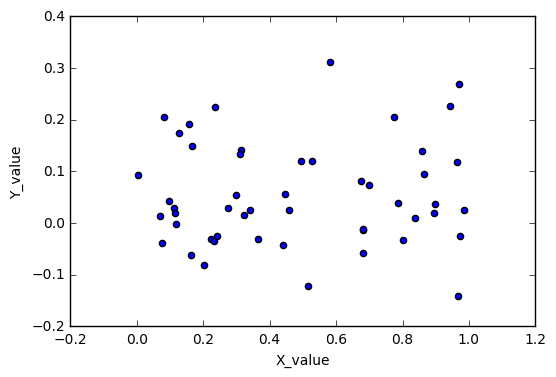

the correlation:  0.0474578778978


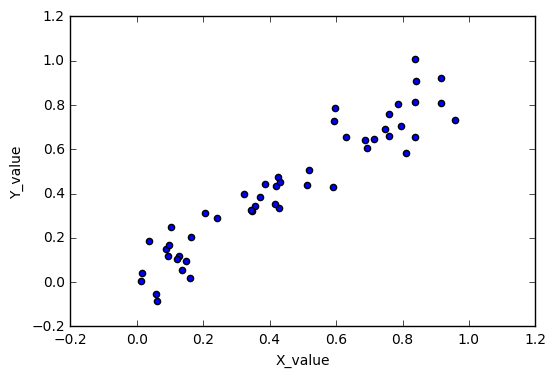

the correlation:  0.946820869977


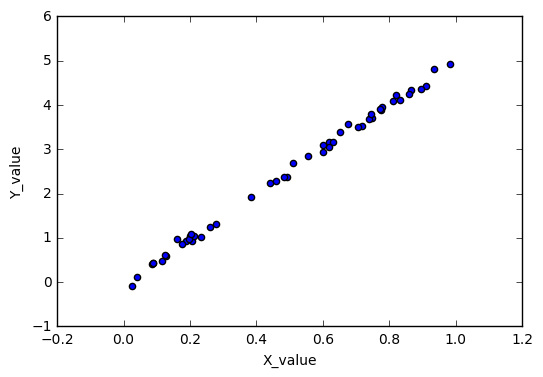

the correlation:  0.998639948923


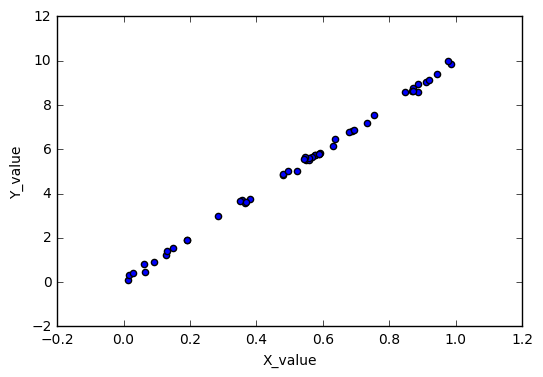

the correlation:  0.999356823634


In [19]:
# X为0到1之间的数
betas = [0.001, 0.1, 1, 5, 10]
for beta in betas:
    X = np.random.rand(50)
    Y = beta * X + np.random.normal(0, 0.1, 50)

    plt.scatter(X, Y)
    plt.xlabel("X_value")
    plt.ylabel("Y_value")
    plt.show()
    print("the correlation: ", np.corrcoef(X, Y)[0, 1])

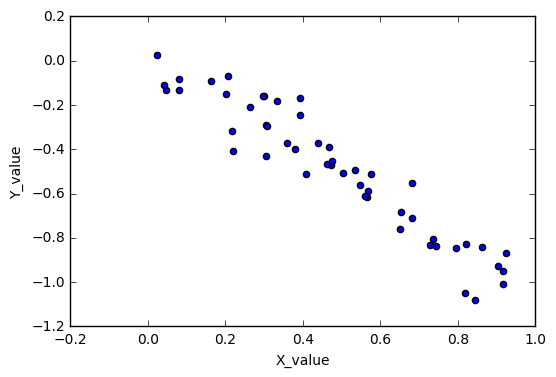

correlation coefficient:  -0.95031788735


In [20]:
X = np.random.rand(50)
Y = - X + np.random.normal(0, 0.1, 50)
plt.scatter(X, Y)
plt.xlabel("X_value")
plt.ylabel("Y_value")
plt.show()
print("correlation coefficient: ", np.corrcoef(X, Y)[0, 1])

## 在金融领域有什么作用？

决定财产的关联程度，当知道两个变量有很大的相关程度的时候，可以利用其中的一个变量来预测未来另外一个变量的值。

在组合投资中，我们可以利用相关系数来选择，相关程度小的产品，这样可以规避风险。

## 非线性相关
虽然线性相关可以很好的反应变量之间的关联程度，但在实际中，两个变量的相关性，可能以另外一种形式呈现，这样的相关性是不能用线性相关来解释。例如，一个变量可能恰好跟随第二个变量的行为，这样就会造成数据的延时，处理这样的情况，需要计算两个序列的变化率序列的线性相关系数，这样就能很好的解决两变量延时性的问题。

另外线性相关对outlier很敏感，一些outlier的数据就会直接影响结果。

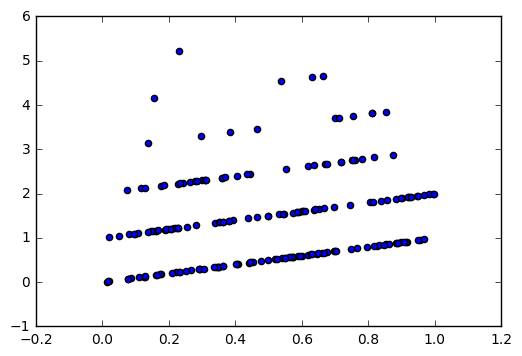

0.20135111947334722

In [22]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X, Y)
plt.show()

np.corrcoef(X, Y)[0, 1]